### Import packages

In [22]:
import pandas as pd
import pyarrow.csv as pv
import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

Fontconfig warning: ignoring UTF-8: not a valid region tag


### Convert data to parquet

In [6]:
city_neighborhood = pv.read_csv('./data/City_of_Edmonton_-_Neighbourhoods_20240201.csv')
city_property_info = pv.read_csv('./data/Property_Information__Current_Calendar_Year__20240201.csv')
city_property_assessment = pv.read_csv('./data/Property_Assessment_Data__Current_Calendar_Year__20240201.csv')

pq.write_table(city_neighborhood,'./data/city_neighborhood.parquet')
pq.write_table(city_property_info,'./data/city_property_info.parquet')
pq.write_table(city_property_assessment,'./data/city_property_assessment.parquet')

### Read data

In [2]:
neighbor = pd.read_parquet('./data/city_neighborhood.parquet')
property_info = pd.read_parquet('./data/city_property_info.parquet')
assessment = pd.read_parquet('./data/city_property_assessment.parquet')

In [4]:
neighbor.head()

,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Description,Effective Start Date,Effective End Date,Civic Ward,Planning District,Geometry Multipolygon
0,ABBOTTSFIELD,2010,Abbottsfield,"Abbottsfield was once owned by E.F. Carey, one...",1981-10-01,None,Métis,118 Avenue,MULTIPOLYGON (((-113.38763361949056 53.5761348...
1,ALBANY,3460,Albany,,2011-06-13,None,Anirniq,Northwest,MULTIPOLYGON (((-113.56024507936962 53.6316036...
2,ALBERTA AVENUE,1010,Alberta Avenue,One of the city's older residential neighbourh...,1981-10-01,None,Métis,118 Avenue,MULTIPOLYGON (((-113.49225733739199 53.5766166...
3,ALBERTA PARK INDUSTRIAL,4010,Alberta Park Industrial,This non-residential neighbourhood is largely ...,1981-10-01,None,Nakota Isga,Jasper Place,MULTIPOLYGON (((-113.59041036545489 53.5665379...
4,ALCES,6669,Alces,Formerly Decoteau North,2019-07-25,None,Sspomitapi,Ellerslie,MULTIPOLYGON (((-113.37648878753762 53.4248774...


In [5]:
property_info.head()

,Account Number,Suite,House Number,Street Name,legal_description,zoning,lot_size,Total Gross Area,year_built,garage,Neighbourhood ID,Neighbourhood,Ward,Latitude,Longitude,Point Location
0,3794377,,NaN,,,A,NaN,,NaN,False,6620.0,RIVER VALLEY GOLD BAR,Métis Ward,53.541953,-113.408346,POINT (-113.40834603699963 53.541952933594935)
1,9018060,,9835.0,71 STREET NW,,AP,NaN,,NaN,False,6730.0,TERRACE HEIGHTS,Métis Ward,53.539089,-113.436267,POINT (-113.43626681866041 53.539088745077535)
2,9964116,,NaN,,,RF1,NaN,0 M2 / 0 FT2,NaN,False,6310.0,HOLYROOD,Métis Ward,53.532271,-113.447592,POINT (-113.44759231831523 53.53227088653109)
3,9988380,,NaN,,Plan: 2629HW,MU,304.0,,1991.0,False,2550.0,MONTROSE,Métis Ward,53.570513,-113.451745,POINT (-113.45174452375724 53.570513479343425)
4,9992244,,NaN,,,RF1,NaN,0 M2 / 0 FT2,NaN,False,5210.0,GRANDVIEW HEIGHTS,papastew Ward,53.500264,-113.549373,POINT (-113.54937250154912 53.500263788056216)


In [6]:
assessment.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,1194950,,8403.0,156 AVENUE NW,N,2050.0,BELLE RIVE,tastawiyiniwak Ward,295500,53.616313,-113.471973,POINT (-113.47197299412386 53.61631345927817),100,NaN,NaN,RESIDENTIAL,,
1,1034339,,9420.0,92 STREET NW,N,6710.0,STRATHEARN,Métis Ward,49836000,53.530949,-113.469279,POINT (-113.46927857387664 53.53094866121484),100,NaN,NaN,OTHER RESIDENTIAL,,
2,1115237,,132.0,GRANDISLE WAY NW,Y,4463.0,RIVERVIEW AREA,sipiwiyiniwak Ward,779000,53.435737,-113.663111,POINT (-113.66311126499042 53.43573662028737),100,NaN,NaN,RESIDENTIAL,,
3,1012293,,15112.0,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin Ward,268500,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,,
4,1191816,,9315.0,175 AVENUE NW,Y,2450.0,LAGO LINDO,tastawiyiniwak Ward,349000,53.636720,-113.485279,POINT (-113.48527866070057 53.63671965668959),100,NaN,NaN,RESIDENTIAL,,


In [7]:
property_info.shape

(425734, 16)

In [8]:
assessment.shape

(425734, 18)

### Join and Merge Data

In [12]:
property_desc = property_info.merge(assessment[['Account Number','Garage','Assessed Value']],how='inner',on='Account Number')

In [14]:
property_desc.head()

,Account Number,Suite,House Number,Street Name,legal_description,zoning,lot_size,Total Gross Area,year_built,garage,Neighbourhood ID,Neighbourhood,Ward,Latitude,Longitude,Point Location,Garage,Assessed Value
0,3794377,,NaN,,,A,NaN,,NaN,False,6620.0,RIVER VALLEY GOLD BAR,Métis Ward,53.541953,-113.408346,POINT (-113.40834603699963 53.541952933594935),N,29500
1,9018060,,9835.0,71 STREET NW,,AP,NaN,,NaN,False,6730.0,TERRACE HEIGHTS,Métis Ward,53.539089,-113.436267,POINT (-113.43626681866041 53.539088745077535),N,10500
2,9964116,,NaN,,,RF1,NaN,0 M2 / 0 FT2,NaN,False,6310.0,HOLYROOD,Métis Ward,53.532271,-113.447592,POINT (-113.44759231831523 53.53227088653109),N,10500
3,9988380,,NaN,,Plan: 2629HW,MU,304.0,,1991.0,False,2550.0,MONTROSE,Métis Ward,53.570513,-113.451745,POINT (-113.45174452375724 53.570513479343425),N,122500
4,9992244,,NaN,,,RF1,NaN,0 M2 / 0 FT2,NaN,False,5210.0,GRANDVIEW HEIGHTS,papastew Ward,53.500264,-113.549373,POINT (-113.54937250154912 53.500263788056216),N,8000


In [21]:
property_desc.to_csv('property_desc.csv',index=False)

<Axes: >

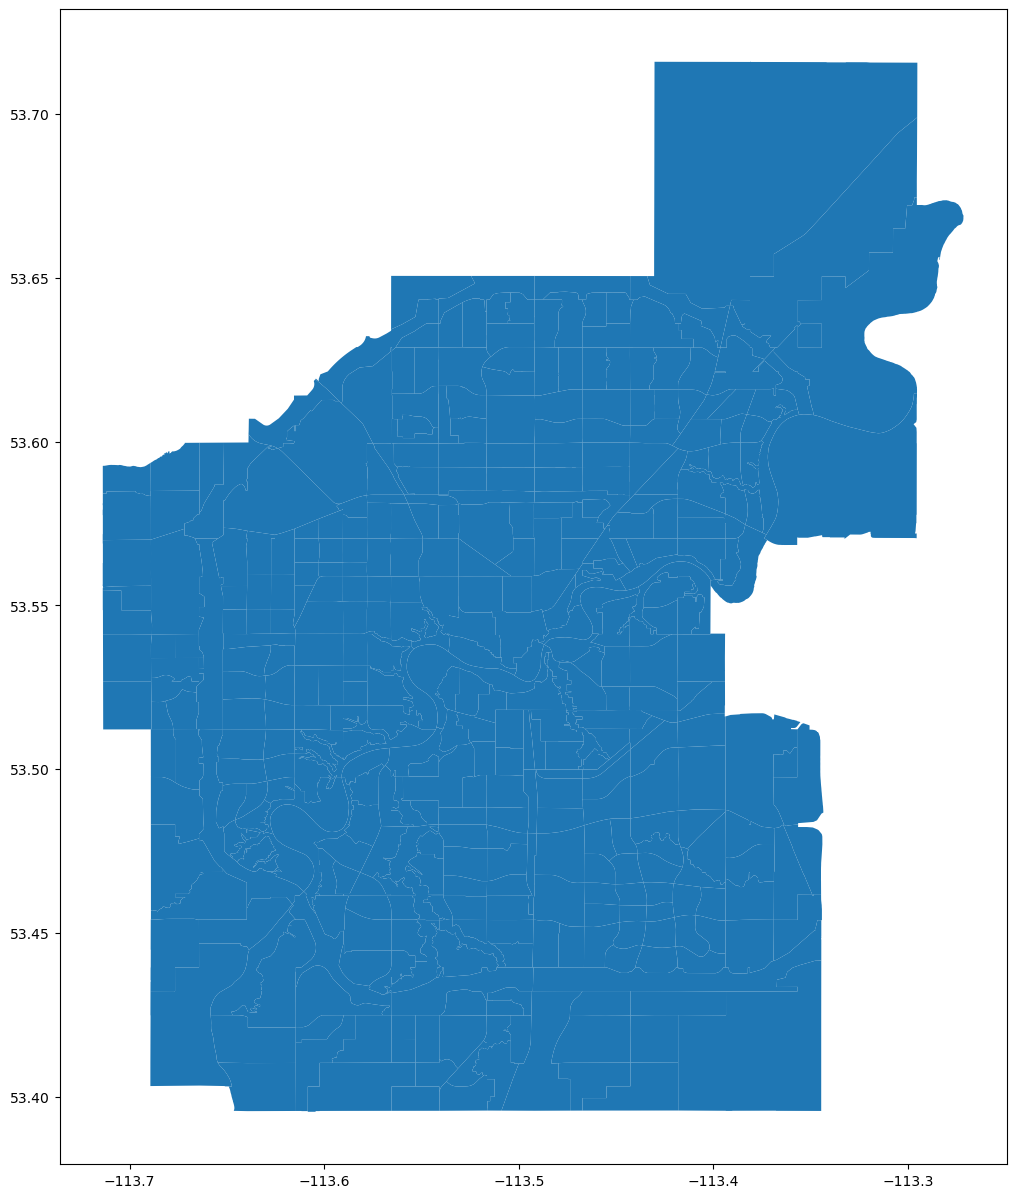

In [33]:
city_map = gpd.read_file('./data/city_map.shp')

fig,ax = plt.subplots(figsize=(15,15))
city_map.plot(ax=ax)